# The Flash Loan Attack Analysis (FAA) Framework

## Importing Blockchain Data

In [1]:
import pandas as pd
from datetime import datetime

### Overall Transaction

In [2]:
transaction_df = pd.read_csv("txlist_data.csv")

transaction_df

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName
0,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,65,0xebc6bd6ac2c9ad4adf4ba57e9f709b8b9cf03c40,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,0,3656990,89000000000,0,1,0xb8e7c2fa,NaN,6231822,2339018,6467692,0xb8e7c2fa,NaN


In [3]:
# We know from inspecting the etherscan website that this is the correct transaction, but we will still check the timestamp matches the date of the warp finance attack
print("The date of the warp finance flash loan attack was the 17th of December 2020")
timestamp = transaction_df["timeStamp"][0]
datetime_obj = datetime.fromtimestamp(timestamp)
print(f"The timestamp of {timestamp} converts to datetime: {datetime_obj} UTC (GMT)")

The date of the warp finance flash loan attack was the 17th of December 2020
The timestamp of 1608243881 converts to datetime: 2020-12-17 22:24:41 UTC (GMT)


### Internal Transactions

In [19]:
internal_transactions_df = pd.read_csv("txlistinternal_data.csv")

internal_transactions_df

,blockNumber,timeStamp,hash,from,to,value,contractAddress,input,type,gas,gasUsed,traceId,isError,errCode
0,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,1462819418141686758539,NaN,NaN,call,2300,41,2_1_2_1_2_1_31_0,0,NaN


### Token Transfers

In [20]:
token_transfers_df = pd.read_csv("tokentx_data.csv")

token_transfers_df.head()

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,90409013949210977199603,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
1,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,82798403238691593953288,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
2,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,96092504596377425124746,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
3,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0x6b175474e89094c44da98b954eedeac495271d0f,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,2900029981390875168951633,Dai Stablecoin,DAI,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
4,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,76436763597706555986902,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255


In [21]:
# Removing columns that aren't relevant to the analysis
columns_to_drop = ["blockNumber", "timeStamp", "hash", "nonce", "blockHash", "tokenName", "transactionIndex", "gas", "gasPrice", "gasUsed", "cumulativeGasUsed", "input", "confirmations"]

token_transfers_df = token_transfers_df.drop(columns=columns_to_drop, axis=1)
token_transfers_df.head()

,from,contractAddress,to,value,tokenSymbol,tokenDecimal
0,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,90409013949210977199603,WETH,18
1,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,82798403238691593953288,WETH,18
2,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,96092504596377425124746,WETH,18
3,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0x6b175474e89094c44da98b954eedeac495271d0f,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,2900029981390875168951633,DAI,18
4,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,76436763597706555986902,WETH,18


In [22]:
# Adding a column to show the value of the transfer in Wei and in the standard token
token_transfers_df = token_transfers_df.rename(columns={"value": "smallestDenominationQuantity"})

# Converting columns to floats (numbers are too large for ints according to OverflowError)
token_transfers_df["smallestDenominationQuantity"] = token_transfers_df["smallestDenominationQuantity"].astype(float)
token_transfers_df["tokenDecimal"] = token_transfers_df["tokenDecimal"].astype(float)

# Creating new column
token_transfers_df["tokenQuantity"] = token_transfers_df["smallestDenominationQuantity"] / (10 ** token_transfers_df["tokenDecimal"])

# Moving the tokenQuantity next to the smallestDenomQuantity
new_column_position = 4
column_names = list(token_transfers_df.columns)
column_names.insert(new_column_position, column_names.pop(column_names.index("tokenQuantity")))
token_transfers_df = token_transfers_df[column_names]

# Removing tokenDecimal as it is no longer useful
token_transfers_df = token_transfers_df.drop(columns="tokenDecimal")

token_transfers_df.head()

,from,contractAddress,to,smallestDenominationQuantity,tokenQuantity,tokenSymbol
0,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,9.040901e+22,9.040901e+04,WETH
1,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,8.279840e+22,8.279840e+04,WETH
2,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,9.609250e+22,9.609250e+04,WETH
3,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0x6b175474e89094c44da98b954eedeac495271d0f,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,2.900030e+24,2.900030e+06,DAI
4,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,7.643676e+22,7.643676e+04,WETH


In [23]:
# Creating a dictionary to translate hex addresses into known tokens, DApps, and contracts
address_dictionary = {
    "0xeBc6bD6aC2C9AD4adf4BA57E9F709b8B9CF03C40": "Attacker",
    "0xdF8BEE861227FFC5EEA819C332A1C170Ae3dbACb": "Attacker's Contract",
    "0xBb2b8038a1640196FbE3e38816F3e67Cba72D940": "Uniswap V2: WBTC-WETH LP",
    "0xB4e16d0168e52d35CaCD2c6185b44281Ec28C9Dc": "Uniswap V2: USDC-WETH LP",
    "0x0d4a11d5EEaaC28EC3F61d100daF4d40471f1852": "Uniswap V2: USDT-WETH LP",
    "0xA478c2975Ab1Ea89e8196811F51A7B7Ade33eB11": "Uniswap V2: WETH-DAI LP",
    "0x1E0447b19BB6EcFdAe1e4AE1694b0C3659614e4e": "dYdX: Solo Margin",
    "0x0000000000000000000000000000000000000000": "Null",  # Used by UniSwap for LP token minting
    "0x13db1CB418573f4c3A2ea36486F0E421bC0D2427": "Warp Vault LP",
    "0xae465FD39B519602eE28F062037F7B9c41FDc8cF": "Warp Vault SC 1",
    "0x6046c3Ab74e6cE761d218B9117d5c63200f4b406": "Warp Vault SC 2",
    "0x397FF1542f962076d0BFE58eA045FfA2d347ACa0": "SushiSwap: USDC/ETH LP",
    "0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2": "Wrapped Ether",
    "0x6B175474E89094C44Da98b954EedeAC495271d0F": "Dai Stablecoin",
    "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48": "USD Coin"
}

# Converting dictionary keys to lowercase
address_dictionary = {key.lower(): value for key, value in address_dictionary.items()}

# Replacing addresses with corresponding public names from the dictionary
token_transfers_df = token_transfers_df.replace(address_dictionary)

token_transfers_df

,from,contractAddress,to,smallestDenominationQuantity,tokenQuantity,tokenSymbol
0,Uniswap V2: WBTC-WETH LP,Wrapped Ether,Attacker's Contract,9.040901e+22,9.040901e+04,WETH
1,Uniswap V2: USDC-WETH LP,Wrapped Ether,Attacker's Contract,8.279840e+22,8.279840e+04,WETH
2,Uniswap V2: USDT-WETH LP,Wrapped Ether,Attacker's Contract,9.609250e+22,9.609250e+04,WETH
3,dYdX: Solo Margin,Dai Stablecoin,Attacker's Contract,2.900030e+24,2.900030e+06,DAI
4,dYdX: Solo Margin,Wrapped Ether,Attacker's Contract,7.643676e+22,7.643676e+04,WETH
5,Attacker's Contract,Dai Stablecoin,Uniswap V2: WETH-DAI LP,2.900030e+24,2.900030e+06,DAI
6,Attacker's Contract,Wrapped Ether,Uniswap V2: WETH-DAI LP,4.519641e+21,4.519641e+03,WETH
7,Null,Uniswap V2: WETH-DAI LP,Attacker's Contract,9.434934e+22,9.434934e+04,UNI-V2
8,Attacker's Contract,Uniswap V2: WETH-DAI LP,Warp Vault LP,9.434934e+22,9.434934e+04,UNI-V2
9,Attacker's Contract,Wrapped Ether,Uniswap V2: WETH-DAI LP,3.412170e+23,3.412170e+05,WETH


## Damage Model Formulation (Warp Finance)

### Defining Constants

In [46]:
# The quantity of DAI borrowed from dYdX
F_0 = token_transfers_df.loc[(token_transfers_df["from"] == "dYdX: Solo Margin") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
print(f"F_0: DAI borrowed from dYdX = {F_0}")

# The quantity of WETH borrowed from Uniswap and dYdX
F_1 = token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: WBTC-WETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]\
    + token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: USDC-WETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]\
    + token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: USDT-WETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]\
    + token_transfers_df.loc[(token_transfers_df["from"] == "dYdX: Solo Margin") & (token_transfers_df["tokenSymbol"] == "WETH"), "tokenQuantity"].iloc[0]
print(f"F_1: WETH borrowed from Uniswap and dYdX= {F_1}\n")

# The quantity of DAI in the pool before providing liquidity
r_0 = 58010988.362646327044546669  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place
print(f"r_0: Quantity of DAI in the Uniswap WETH-DAI liquidity pool prior to providing WETH-DAI liquidity = {r_0}")

# The quantity of WETH in the pool before providing liquidity
r_1 = 90409.013949210977199604  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place
print(f"r_1: Quantity of WETH in the Uniswap WETH-DAI liquidity pool prior to providing WETH-DAI liquidity = {r_1}\n")

# The quantity of DAI provided to the Uniswap WETH-DAI pool
s_0 = F_0
print(f"s_0: Quantity of DAI supplied to the Uniswap WETH-DAI liquidity pool = {s_0}")

# The quantity of WETH-DAI LP tokens before providing liquidity
lp = 1887324.80  # TODO: Use Uniswap TheGraph to find this
print(f"lp: Quantity of WETH-DAI LP tokens in the pool prior to providing WETH-DAI liquidity = {lp}")

# Time Weighted Average Price of DAI retrieved from the DAI-USDC Uniswap pool
twap_0 = 1  # TODO: Use Uniswap TheGraph to find this
print(f"twap_0: The time weighted average price of DAI retrieved from the DAI-USDC Uniswap pool = {twap_0}")

# Time Weighted Average Price of WETH retrieved from the WETH-USDC Uniswap pool
twap_1 = 585  # TODO: Use Uniswap TheGraph to find this
print(f"twap_1: The time weighted average price of WETH retrieved from the WETH-USDC Uniswap pool = {twap_1}")

# The amount of DAI available in the Warp Finance vault
V_dai = 3862646.608579660094744529 # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place
print(f"    V_dai: The quantity of DAI available in the Warp Finance vault = {V_dai}")

# The amount of USDC available in the Warp Finance vault
V_usdc = 3917983.816718  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place
print(f"   V_usdc: The quantity of USDC available in the Warp Finance vault = {V_usdc}")

# The quantity of WETH in the USDC-WETH SushiSwap pool
r_weth = 110167.374111420695655184  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

# The quantity of USDC in the USDC-WETH SushiSwap pool
r_usdc = 70837678.781592 # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

# The quantity of WETH available in the Uniswap Flashswap service
F_1_fs = 269299.92  # TODO: Use Uniswap TheGraph to find this
print(f"   F_1_fs: The quantity of WETH received for the exchange of the remaining USDC = {F_1_fs}")

# The Uniswap Flashswap service fee
c = F_1_fs * 0.00301114
print(f"        c: The Uniswap Flashswap service fee = {c}")

F_0: DAI borrowed from dYdX = 2900029.981390875
F_1: WETH borrowed from Uniswap and dYdX= 345736.68538198655

r_0: Quantity of DAI in the Uniswap WETH-DAI liquidity pool prior to providing WETH-DAI liquidity = 58010988.36264633
r_1: Quantity of WETH in the Uniswap WETH-DAI liquidity pool prior to providing WETH-DAI liquidity = 90409.01394921097

s_0: Quantity of DAI supplied to the Uniswap WETH-DAI liquidity pool = 2900029.981390875
lp: Quantity of WETH-DAI LP tokens in the pool prior to providing WETH-DAI liquidity = 1887324.8
twap_0: The time weighted average price of DAI retrieved from the DAI-USDC Uniswap pool = 1
twap_1: The time weighted average price of WETH retrieved from the WETH-USDC Uniswap pool = 585
    V_dai: The quantity of DAI available in the Warp Finance vault = 3862646.6085796603
   V_usdc: The quantity of USDC available in the Warp Finance vault = 3917983.816718
   F_1_fs: The quantity of WETH received for the exchange of the remaining USDC = 269299.92
        c: Th

### Defining the Damage Function

In [51]:
def damage_model(model, F_0, F_1, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc, c):
    # The quantity of WETH provided to the WETH-DAI pool
    s_1 = (r_1 / r_0) * s_0
    #print(f"      s_1: Quantity of WETH supplied to the Uniswap WETH-DAI liquidity pool = {s_1}\n")

        # The quantity of WETH-DAI LP tokens minted upon providing liquidity, which were then all used as collateral
    D = lp * (F_0 / r_0)
    #print(f"        D: Quantity of WETH-DAI LP tokens minted upon providing WETH-DAI liquidity = {D}")

    # The quantity of WETH-DAI LP tokens after providing liquidity
    LP = lp + D
    #print(f"       LP: Quantity of WETH-DAI LP tokens in the pool after providing WETH-DAI liquidity = {LP}\n")

    # The quantity of DAI in the pool after providing liquidity (i.e. the reserve)
    R_0 = r_0 + s_0
    #print(f"      R_0: Quantity of DAI in the Uniswap WETH-DAI liquidity pool after providing WETH-DAI liquidity = {R_0}")

    # The quantity of DAI in the pool after providing liquidity (i.e. the reserve)
    R_1 = r_1 + s_1
    #print(f"      R_1: Quantity of WETH in the Uniswap WETH-DAI liquidity pool after providing WETH-DAI liquidity = {R_1}\n")

    # LP price calculation
    if model == "Warp Finance":
        # The LP token price calculated using the TWAP of DAI and WETH and their real time reserves
        P_LP = (R_0 * twap_0 + R_1 * twap_1) / LP
    elif model == "Fair Reserve":
        k = r_0 * r_1
        P_LP =  (2 * (k * twap_1 * twap_0) ** 0.5) / LP
    #print(f"     P_LP: The LP token price calculated using TWAP and real-time reserves: {P_LP}")

    # The Warp finance borrowing limit when the LP token is used as collateral
    B = (P_LP * D) / 1.5
    #print(f"        B: The borrow limit calculated by the Warp Finance protocol when all minted LP tokens are used as collateral = {B}\n")

    # The remaining WETH after supplying liquidity (s_1) that is then exchanged for DAI
    In_1 = F_1 - s_1
    #print(f"     In_1: The quantity of WETH remaining after supplying liquidity = {In_1}")

    # The DAI received in exchange for all the remaining WETH at a 0.3% fee
    Out_0 = (R_0 / (R_1 + 0.997 * In_1)) * 0.997 * In_1
    #print(f"    Out_0: The quantity of DAI received from the exchanged WETH = {Out_0}\n")

    # The new reserve quantity of DAI tokens in the WETH-DAI liquidity pool
    R_0_new = R_0 - Out_0
    #print(f"     R'_0: The new reserve quantity of DAI in the WETH-DAI liquidity pool = {R_0_new}")

    # The new reserve quantity of WETH tokens in the WETH-DAI liquidity pool
    R_1_new = R_1 + In_1
    #print(f"     R'_1: The new reserve quantity of WETH in the WETH-DAI liquidity pool = {R_1_new}")

    # Calculating the new value of the LP token
    if model == "Warp Finance":
        # The new value of the LP token based on the new reserve quantities
        P_LP_new = (R_0_new * twap_0 + R_1_new * twap_1) / LP
    elif model == "Fair Reserve":
        P_LP_new =  P_LP
    #print(f"    P'_LP: The new LP token price given the new reserve quantities of WETH and DAI = {P_LP_new}")

    # The new borrow limit on the Warp Finance protocol based on this new, apparent LP value
    B_new = (P_LP_new * D) / 1.5
    #print(f"       B': The new borrow limit calculated by the Warp Finance protocol with the manipulated LP token value = {B_new}\n")

    # The amount of DAI borrowed using all LP tokens at this false value as collateral
    B_dai = min(B_new, V_dai)
    #print(f"    B_dai: The quantity of DAI that can be borrowed by the attacker using the LP as collateral = {B_dai}\n")

    # The amount of USDC the attacker can borrow using the LP as collateral after clearing out the DAI vault
    B_usdc = min(B_new - B_dai, V_usdc)
    #print(f"   B_usdc: The quantity of USDC that can be borrowed by the attacker using the LP as collateral = {B_usdc}\n")

    # The quantity of DAI remaining after repaying the dYdX flash loan for the attacker to exchange for WETH
    In_0 = Out_0 + B_dai - F_0
    #print(f"     In_0: The quantity of DAI the attacker has after repaying the dYdX flash loan = {In_0}")

    # The quantity of WETH received in exchange for this remaining DAI with a 0.3% fee on Uniswap
    Out_weth_us = (R_1_new / (R_0_new + 0.997 * In_0)) * 0.997 * In_0
    #print(f"Out_WETH': The quantity of WETH received for the exchange of the remaining DAI = {Out_weth_us}")

    # The quantity of WETH received in exchange for USDC with a 0.3% fee on SushiSwap
    Out_weth_ss = (r_weth / (r_usdc + 0.997 * B_usdc)) * 0.997 * B_usdc
    #print(f" Out_WETH: The quantity of WETH received for the exchange of the remaining USDC = {Out_weth_ss}\n")

    # The damage caused
    dmg = Out_weth_us + Out_weth_ss - F_1 - c
    #print(f"      dmg: The damage caused by the attacker = {dmg}")

    return s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, dmg

In [52]:
s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, dmg = damage_model("Warp Finance", F_0, F_1, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc, c)

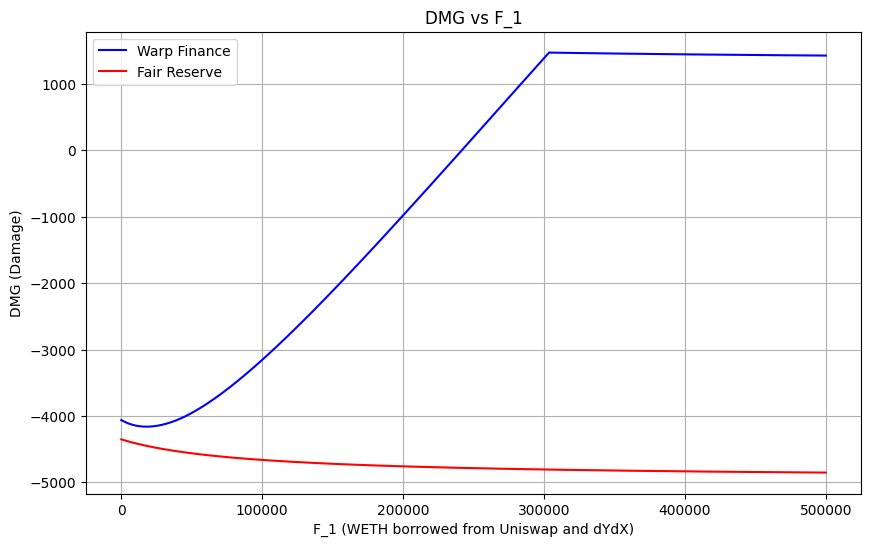

In [56]:
import matplotlib.pyplot as plt

# Define a range of F_1 values from 0 to 500,000
F_1_values = range(0, 500000)

# Initialize empty lists to store dmg values for both models
dmg_values_warp = []
dmg_values_fair = []

# Loop through the F_1 values and calculate dmg for each value for both models
for F_1_value in F_1_values:
    # Calculate dmg for "Warp Finance" model
    s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, dmg_warp = damage_model("Warp Finance", F_0, F_1_value, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc, c)
    dmg_values_warp.append(dmg_warp)

    # Calculate dmg for "Fair Reserve" model
    s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, dmg_fair = damage_model("Fair Reserve", F_0, F_1_value, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc, c)
    dmg_values_fair.append(dmg_fair)

# Plot the DMG vs F_1 continuous line plot for both models
plt.figure(figsize=(10, 6))
plt.plot(F_1_values, dmg_values_warp, color='b', label='Warp Finance')
plt.plot(F_1_values, dmg_values_fair, color='r', label='Fair Reserve')
plt.xlabel('F_1 (WETH borrowed from Uniswap and dYdX)')
plt.ylabel('DMG (Damage)')
plt.title('DMG vs F_1')
plt.legend()
plt.grid()
plt.show()


In [55]:
print(max(dmg_values))

1475.9155538951145


## Damage Model Validation (Warp Finance)

In [12]:
# Defining a function to check that each variable is within 0.01% of the real world data
def is_valid(var_str, var, true_var):
    diff = abs(true_var - var)
    if true_var * 1.0001 >= var >= true_var * 0.9999:
        print(f"VALID: The calculated value of {var_str} is within 0.01% of the transaction data value, the difference between them is {diff}\n")
    else:
        print(f"INVALID: The calculated value of {var_str} is not within 0.01% of the true value, the difference between them is {diff}\n")

In [13]:
# Validating the calculated quantity of DAI provided to the Uniswap WETH-DAI pool
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[0]
is_valid("s_0", s_0, data)

# Validating the calculated quantity of WETH provided to the Uniswap WETH-DAI pool
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[0]
is_valid("s_1", s_1, data)

# Validating the calculated quantity of Uniswap LP tokens received by the attacker
data = token_transfers_df.loc[(token_transfers_df["from"] == "Null") & (token_transfers_df["tokenSymbol"] == "UNI-V2") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("D", D, data)


VALID: The calculated value of s_0 is within 0.01% of the transaction data value, the difference between them is 0.0

VALID: The calculated value of s_1 is within 0.01% of the transaction data value, the difference between them is 0.0

VALID: The calculated value of D is within 0.01% of the transaction data value, the difference between them is 0.00017081147234421223



In [14]:
# Validating the calculated quantity of WETH exchanged for DAI using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[1]
is_valid("In_1", In_1, data)

# Validating the calculated quantity of DAI received in exchange for the WETH using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: WETH-DAI LP") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("Out_0", Out_0, data)

VALID: The calculated value of In_1 is within 0.01% of the transaction data value, the difference between them is 5.820766091346741e-11

VALID: The calculated value of Out_0 is within 0.01% of the transaction data value, the difference between them is 7.450580596923828e-09



In [15]:
# Validating the calculated quantity of USDC received from the Warp Finance loan
data = token_transfers_df.loc[(token_transfers_df["from"] == "Warp Vault SC 1") & (token_transfers_df["tokenSymbol"] == "USDC") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("B_usdc", B_usdc, data)

# Validating the calculated quantity of DAI received from the Warp Finance loan
data = token_transfers_df.loc[(token_transfers_df["from"] == "Warp Vault SC 2") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("B_dai", B_dai, data)

VALID: The calculated value of B_usdc is within 0.01% of the transaction data value, the difference between them is 9.997747838497162e-07

VALID: The calculated value of B_dai is within 0.01% of the transaction data value, the difference between them is 0.0



In [16]:
# Validating the calculated quantity of DAI exchanged for WETH using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[1]
is_valid("In_0", In_0, data)

# Validating the calculated quantity of WETH received in exchange for the DAI using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: WETH-DAI LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("Out_weth_us", Out_weth_us, data)

VALID: The calculated value of In_0 is within 0.01% of the transaction data value, the difference between them is 1.4901161193847656e-08

VALID: The calculated value of Out_weth_us is within 0.01% of the transaction data value, the difference between them is 5.820766091346741e-11



In [17]:
# Validating the calculated quantity of WETH received for the remaining USDC (post uniswap loan repayment) from SushiSwap
data = token_transfers_df.loc[(token_transfers_df["from"] == "SushiSwap: USDC/ETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("Out_weth_ss", Out_weth_ss, data)

# Validating the total damage caused by the attacker
data = int(internal_transactions_df["value"].iloc[0]) / 10 ** 18
is_valid("dmg", dmg, data)

VALID: The calculated value of Out_weth_ss is within 0.01% of the transaction data value, the difference between them is 1.393345883116126e-09

VALID: The calculated value of dmg is within 0.01% of the transaction data value, the difference between them is 4.245363697918947e-06



## Fair Reserve Damage Model Simulation (Mitigation Test)

In [227]:
F_0, F_1, r_0, r_1, s_0, s_1, lp, D, LP, R_0, R_1, twap_0, twap_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, V_dai, B_dai, V_usdc, B_usdc, In_0, Out_weth_us, Out_weth_ss, F_1_fs, c, dmg = damage_model("Fair Reserve")

      F_0: DAI borrowed from dYdX = 2900029.981390875
      F_1: WETH borrowed from Uniswap and dYdX= 345736.68538198655

      r_0: Quantity of DAI in the Uniswap WETH-DAI liquidity pool prior to providing WETH-DAI liquidity = 58010988.36
      r_1: Quantity of WETH in the Uniswap WETH-DAI liquidity pool prior to providing WETH-DAI liquidity = 90409.01

      s_0: Quantity of DAI supplied to the Uniswap WETH-DAI liquidity pool = 2900029.981390875
      s_1: Quantity of WETH supplied to the Uniswap WETH-DAI liquidity pool = 4519.640968031723

       lp: Quantity of WETH-DAI LP tokens in the pool prior to providing WETH-DAI liquidity = 1887324.8
        D: Quantity of WETH-DAI LP tokens minted upon providing WETH-DAI liquidity = 94349.34069140098
       LP: Quantity of WETH-DAI LP tokens in the pool after providing WETH-DAI liquidity = 1981674.140691401

      R_0: Quantity of DAI in the Uniswap WETH-DAI liquidity pool after providing WETH-DAI liquidity = 60911018.34139088
      R_1: Qu

## Internal Parameter Adjustment

## External Parameter Adjustment